In [1]:
from statsmodels.tools.sm_exceptions import ValueWarning

import loadDataForSKtime
import ARIMAmodel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueWarning)

In [2]:
loaderHR = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR'])
sktime_df_hr = loaderHR.load_data(100)
train_data_hr, test_data_hr = loaderHR.split_train_test(sktime_df_hr)

<class 'list'>
Patient 2: Less than 46 time points — skipping.
Patient 4: Less than 46 time points — skipping.
Patient 6: Less than 46 time points — skipping.
Patient 7: Less than 46 time points — skipping.
Patient 8: Less than 46 time points — skipping.
Patient 10: Less than 46 time points — skipping.
Patient 11: Less than 46 time points — skipping.
Patient 12: Less than 46 time points — skipping.
Patient 13: Less than 46 time points — skipping.
Patient 14: Less than 46 time points — skipping.
Patient 15: Less than 46 time points — skipping.
Patient 16: Less than 46 time points — skipping.
Patient 17: Less than 46 time points — skipping.
Patient 20: Less than 46 time points — skipping.
Patient 22: Less than 46 time points — skipping.
Patient 23: Less than 46 time points — skipping.
Patient 26: Less than 46 time points — skipping.
Patient 27: Less than 46 time points — skipping.
Patient 28: Less than 46 time points — skipping.
Patient 30: Less than 46 time points — skipping.
Patient 33

In [6]:
print("Train IDs:", sorted(train_data_hr.index.get_level_values("Patient_ID").unique()))
print("Test  IDs:", sorted(test_data_hr.index.get_level_values("Patient_ID").unique()))

Train IDs: [1, 3, 5, 9, 18, 19, 21, 24, 25, 29, 31, 32, 42, 46, 50, 54, 68, 71, 76, 78, 83, 85, 87, 91, 98]
Test  IDs: [1, 3, 5, 9, 18, 19, 21, 24, 25, 29, 31, 32, 42, 46, 50, 54, 68, 71, 76, 78, 83, 85, 87, 91, 98]


In [6]:
# load pickle file
#import pandas as pd
#train_data = pd.read_pickle("all_train_data_neg1fill.pkl")
#test_data = pd.read_pickle("all_test_data_neg1fill.pkl")

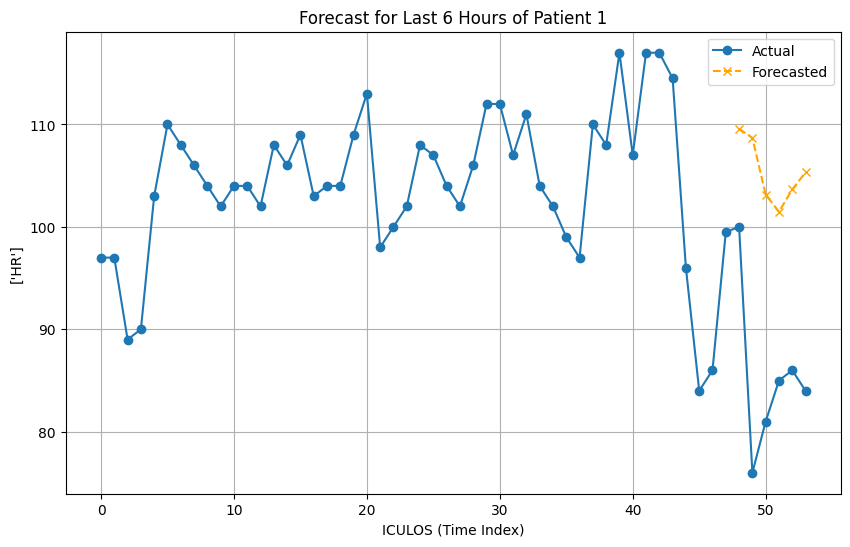

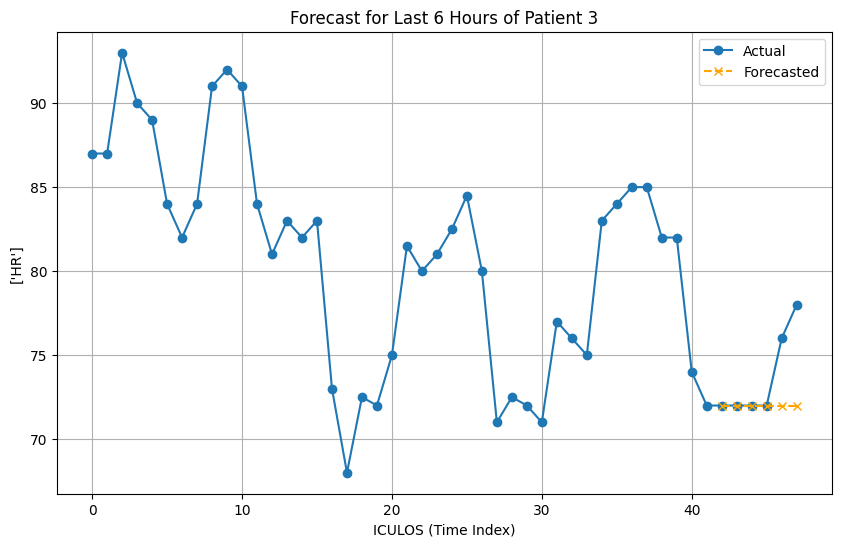

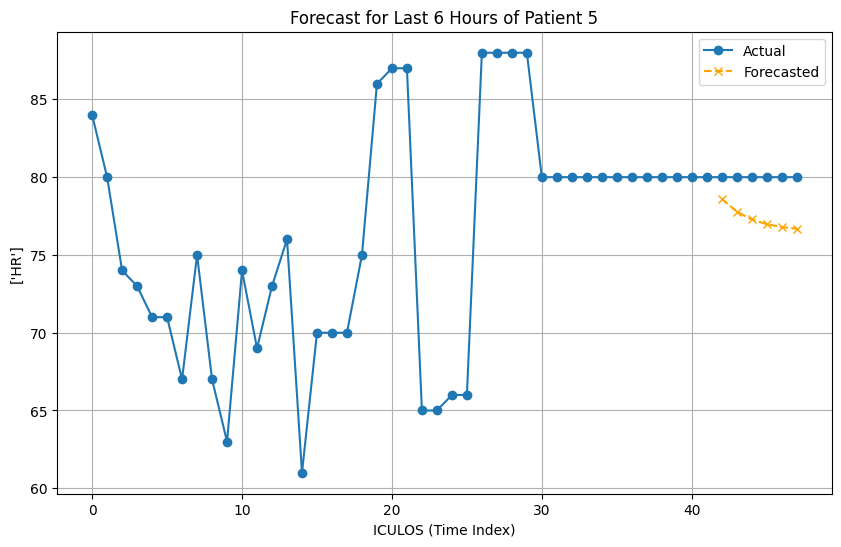

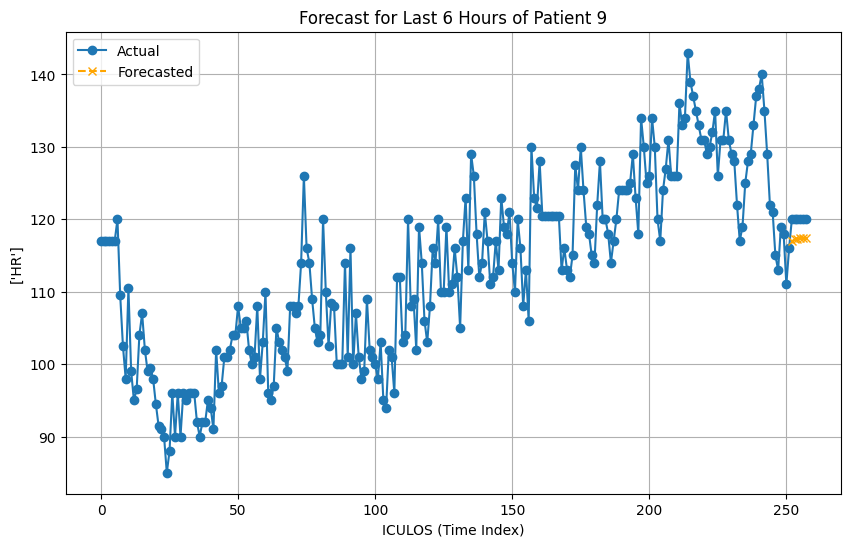

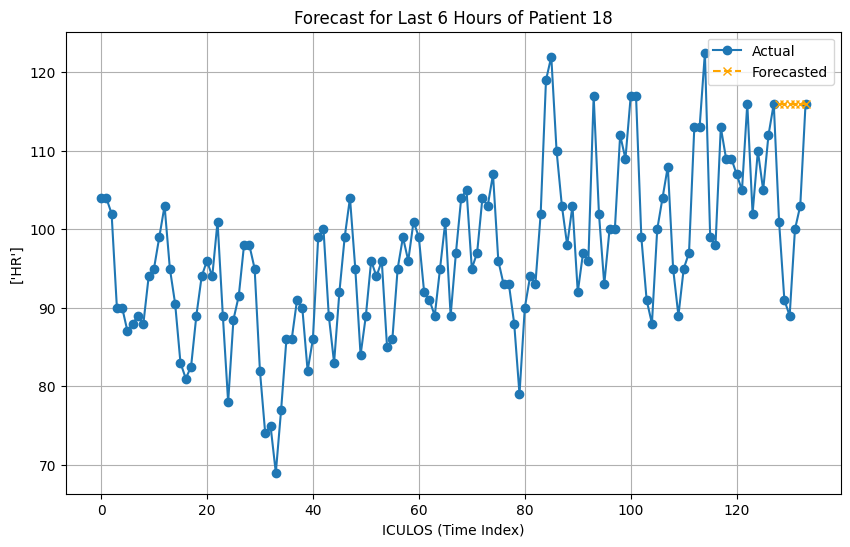

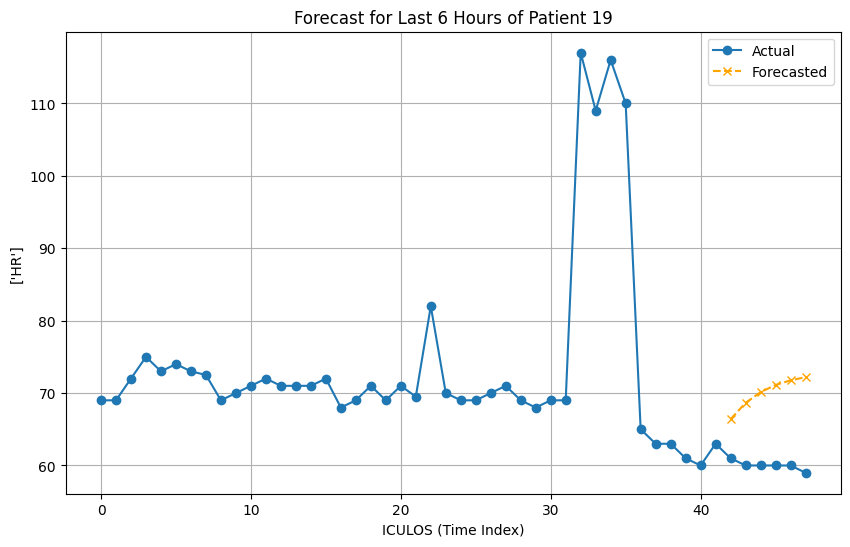

In [7]:
HRforecaster = ARIMAmodel.ARIMAForecaster(['HR'], train_data_hr, test_data_hr)
HRforecaster.fit()
forecastsHR = HRforecaster.predict(steps=6)

for patient_id in range(1, 20):
    if patient_id in forecastsHR.index.get_level_values("Patient_ID"):
        HRforecaster.plot_forecast(forecastsHR, patient_id=patient_id, steps=6)


In [11]:
print(forecastsHR)

                           HR
Patient_ID ICULOS            
1          48      109.581384
           49      108.681792
           50      103.144997
           51      101.478088
           52      103.648951
...                       ...
98         49       77.346370
           50       75.353143
           51       74.139820
           52       73.401242
           53       72.951653

[150 rows x 1 columns]


In [9]:
HRforecaster.evaluate_model(forecastsHR)

Model Evaluation Results:
  - Mean Absolute Error (MAE): 7.5753
  - Mean Squared Error (MSE): 111.6478
  - Root Mean Squared Error (RMSE): 10.5664
  - Mean Absolute Percentage Error (MAPE): 8.70%
  - Forecasting Accuracy: 91.30%


{'MAE': 7.575322756182343,
 'MSE': 111.64778801351252,
 'RMSE': 10.566351688899651,
 'MAPE': 8.700504126696273,
 'Accuracy': 91.29949587330373}

In [12]:
import numpy as np
from sktime.distances import dtw_distance

x = np.array(test_data_hr)
y = np.array(forecastsHR)
dtw_distance(x, y)

11604.704555046124

In [6]:
loaderTEMP = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['Temp'])
sktime_df_temp = loaderTEMP.load_data(100)
train_data_temp, test_data_temp = loaderTEMP.split_train_test(sktime_df_temp)

<class 'list'>
Patient 2: Less than 46 time points — skipping.
Patient 4: Less than 46 time points — skipping.
Patient 6: Less than 46 time points — skipping.
Patient 7: Less than 46 time points — skipping.
Patient 8: Less than 46 time points — skipping.
Patient 10: Less than 46 time points — skipping.
Patient 11: Less than 46 time points — skipping.
Patient 12: Less than 46 time points — skipping.
Patient 13: Less than 46 time points — skipping.
Patient 14: Less than 46 time points — skipping.
Patient 15: Less than 46 time points — skipping.
Patient 16: Less than 46 time points — skipping.
Patient 17: Less than 46 time points — skipping.
Patient 20: Less than 46 time points — skipping.
Patient 22: All ['Temp'] values are NaN — skipping.
Patient 23: Less than 46 time points — skipping.
Patient 26: Less than 46 time points — skipping.
Patient 27: Less than 46 time points — skipping.
Patient 28: Less than 46 time points — skipping.
Patient 30: Less than 46 time points — skipping.
Patient

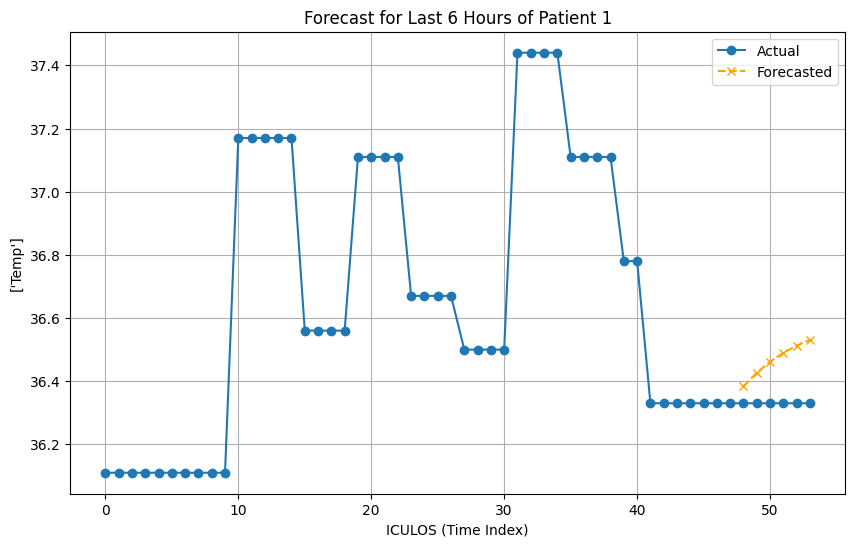

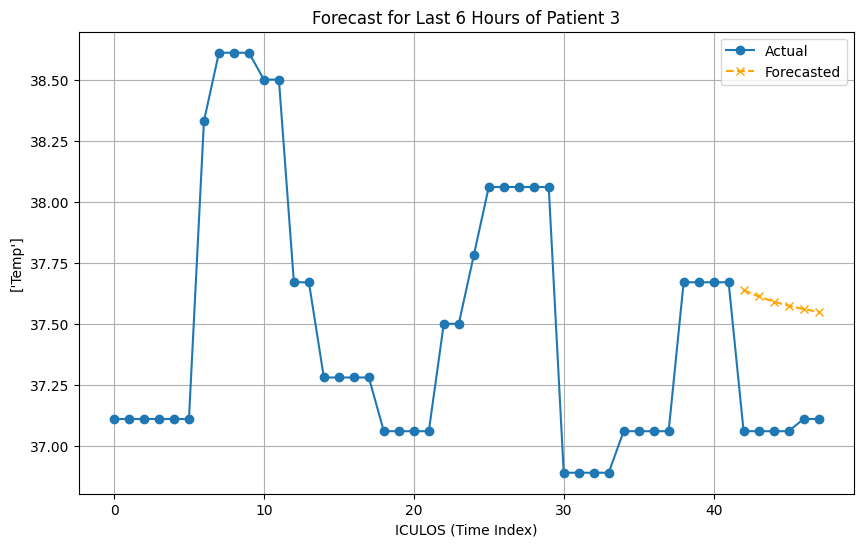

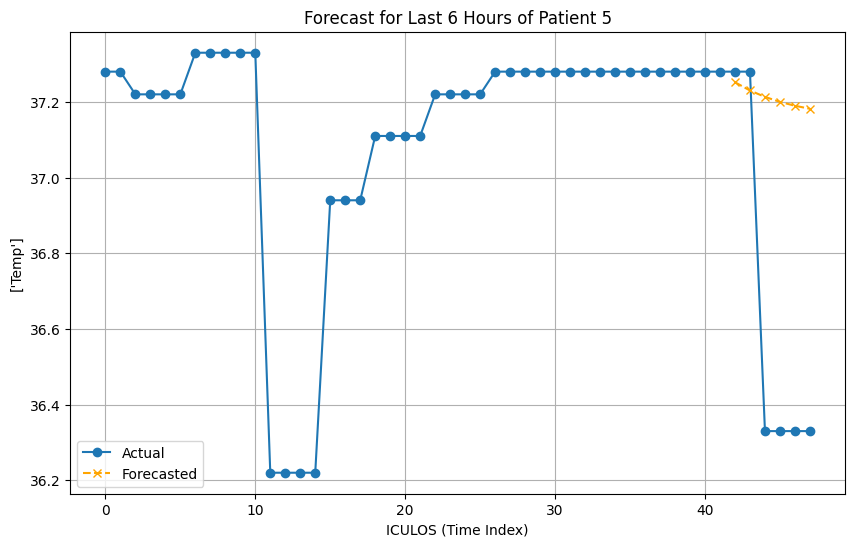

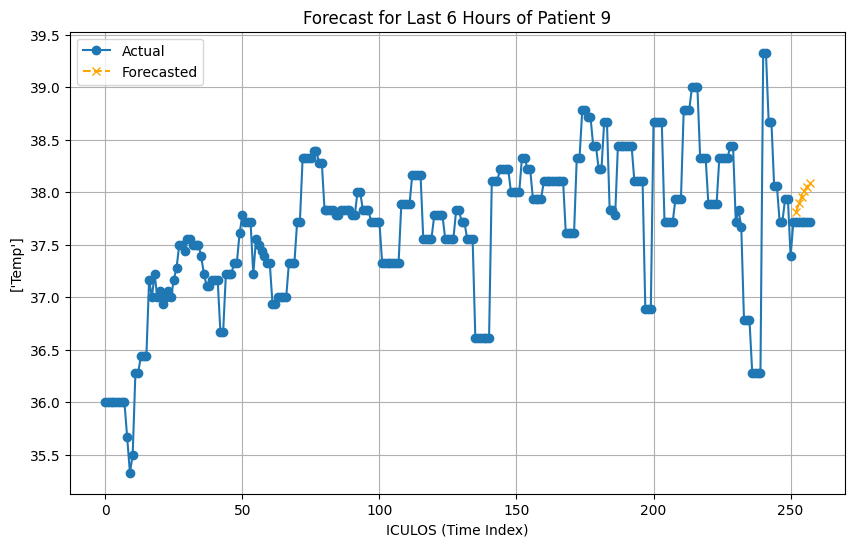

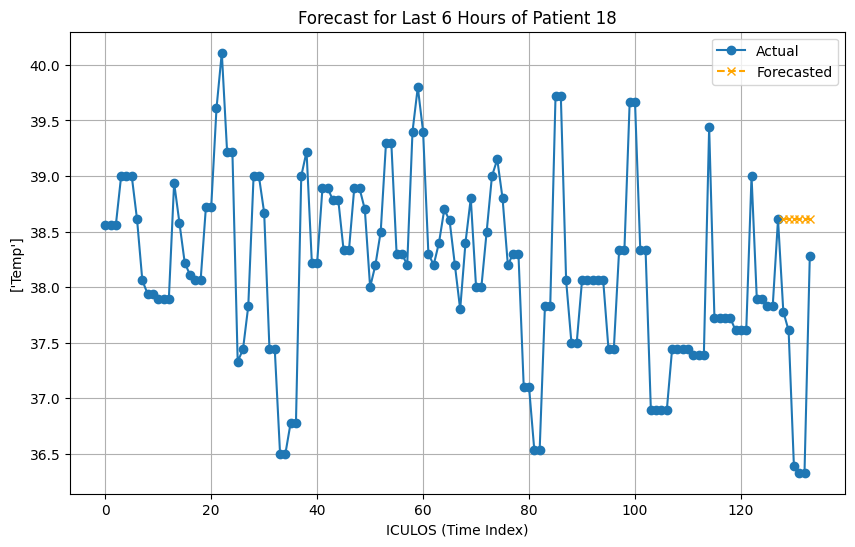

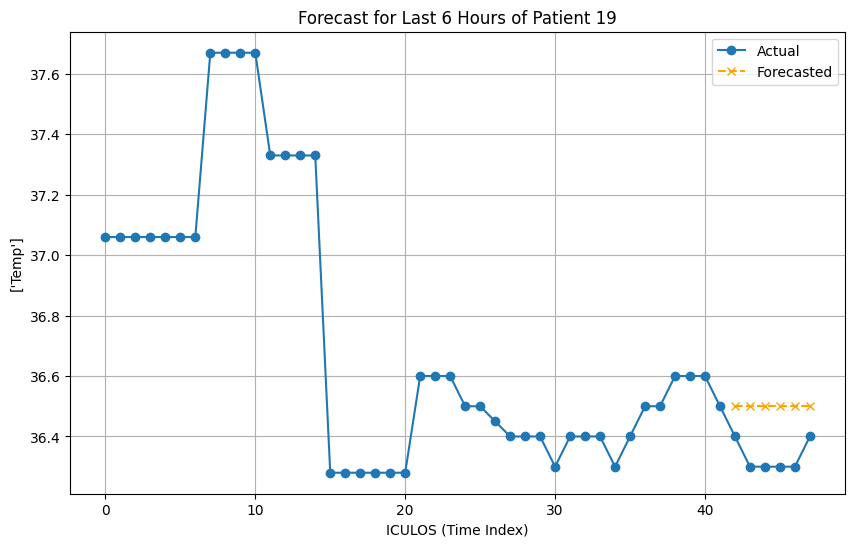

In [8]:
TEMPforecaster = ARIMAmodel.ARIMAForecaster(['Temp'], train_data_temp, test_data_temp)
TEMPforecaster.fit()
forecastsTEMP = TEMPforecaster.predict(steps=6)

for patient_id in range(1, 20):
    if patient_id in forecastsTEMP.index.get_level_values("Patient_ID"):
        TEMPforecaster.plot_forecast(forecastsTEMP, patient_id=patient_id, steps=6)


In [9]:
TEMPforecaster.evaluate_model(forecastsTEMP)

Model Evaluation Results:
  - Mean Absolute Error (MAE): 0.3589
  - Mean Squared Error (MSE): 0.2939
  - Root Mean Squared Error (RMSE): 0.5421
  - Mean Absolute Percentage Error (MAPE): 0.97%
  - Forecasting Accuracy: 99.03%


(0.35886028831096495,
 0.29387849795681914,
 0.5421056151312391,
 0.9733198591296708,
 99.02668014087033)